In [1]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7
rcParams['font.size'] = 25

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
c1_t0 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster1_t0')
c1_t0['cluster'] = 3 * np.ones(c1_t0.shape[0], dtype=np.int)
c2_t0 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster2_t0')
c2_t0['cluster'] = 2 * np.ones(c2_t0.shape[0], dtype=np.int)
c3_t0 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster3_t0')
c3_t0['cluster'] = 1 * np.ones(c3_t0.shape[0], dtype=np.int)

c1_t1 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster1_t1')
c1_t1['cluster'] = 1 * np.ones(c1_t1.shape[0], dtype=np.int)
c2_t1 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster2_t1')
c2_t1['cluster'] = 2 * np.ones(c2_t1.shape[0], dtype=np.int)
c3_t1 = pd.read_pickle('/media/fabian/FDEB-A8C5/cluster3_t1')
c3_t1['cluster'] = 3 * np.ones(c3_t1.shape[0], dtype=np.int)


In [3]:
T0 = c1_t0.append(c2_t0).append(c3_t0)
T1 = c1_t1.append(c2_t1).append(c3_t1)
T1 = T1.drop('Date', axis=1)
T1_unique_ids = T1.ID.unique()
T0_unique_ids = T0.ID.unique()

In [4]:
T0_filtered = T0.select(lambda i: T0.iloc[i].ID in T1_unique_ids).sort_values('ID')
T1_filtered = T1.select(lambda i: T1.iloc[i].ID in T0_unique_ids).sort_values('ID')

In [5]:
T0_filtered

,ID,IMG,Label,cluster
0,84,AD771,1,1
1,588,AD969,0,3
2,1004,AD1152,0,2
3,1176,AD1266,0,2
4,1319,AD1232,0,3
5,1340,AD1272,0,3
6,1463,AD1453,0,2
7,1477,AD1377,1,1
9,1615,AD1371,1,1
10,1653,FT008-1,0,2


In [6]:
print(T1_filtered.shape)
print(T0_filtered.shape)

(64, 4)
(64, 4)


In [7]:
from sklearn.metrics import confusion_matrix

Normalized confusion matrix
[[ 0.67  0.12  0.21]
 [ 0.48  0.43  0.09]
 [ 0.41  0.35  0.24]]


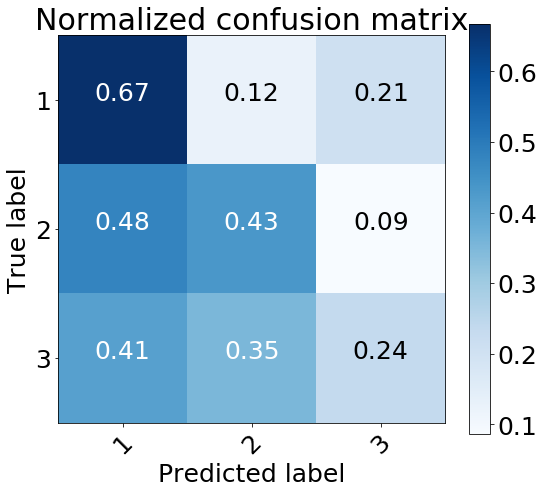

In [8]:
import itertools

class_names = [1, 2, 3]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(T0_filtered.cluster.values, T1_filtered.cluster.values)
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [9]:
((T0_filtered.cluster.values == 1) & (T1_filtered.cluster.values == 1)).mean()

0.25

In [10]:
T1_filtered[T1_filtered.cluster == 1]

,ID,IMG,Label,cluster
2,1004,AD1333,0,1
3,1176,AD1506,0,1
4,1319,FT017-1,0,1
5,1340,AD1489,0,1
6,1463,FT064-1,0,1
8,1615,FT049-1,1,1
10,1907,FT010-2,0,1
12,2500,FT073-2,0,1
13,2522,FT132-2,1,1
15,3031,FT147-2,0,1


In [20]:
# images in both cluster 1
tmp2 = T1_filtered[T1_filtered.cluster == 1]
IDS_t0 = T0_filtered[T0_filtered.cluster == 1].ID.unique()
tmp2.select(lambda j: tmp2.loc[j].ID in IDS_t0)

,ID,IMG,Label,cluster
8,1615,FT049-1,1,1
13,2522,FT132-2,1,1
20,4375,FT237-2,0,1
23,4747,FT283-2,1,1
31,9283,NIFD002-1,1,1
36,11028,NIFD008-2,1,1
37,11704,NIFD013-2,1,1
54,16825,NIFD159-3,1,1
62,21032,PPG0439-2,0,1


In [21]:
# images in both cluster 2
tmp2 = T1_filtered[T1_filtered.cluster == 2]
IDS_t0 = T0_filtered[T0_filtered.cluster == 2].ID.unique()
tmp2.select(lambda j: tmp2.loc[j].ID in IDS_t0)

,ID,IMG,Label,cluster
9,1653,FT008-2,0,2
26,5830,FT325-2,0,2
33,10114,PPG0032-1,0,2
42,13138,NIFD060-3,0,2
43,13272,NIFD056-2,0,2
51,15774,NIFD115-2,0,2
58,18304,PPG0371-2,1,2


In [22]:
# images in both cluster 3
tmp2 = T1_filtered[T1_filtered.cluster == 3]
IDS_t0 = T0_filtered[T0_filtered.cluster == 3].ID.unique()
tmp2.select(lambda j: tmp2.loc[j].ID in IDS_t0)


,ID,IMG,Label,cluster
1,588,AD1342,0,3
11,2275,FT048-2,0,3


In [ ]:
tmp

In [ ]:
pd.to_pickle(T0_filtered[T0_filtered.cluster == 1], 't0_id1')

In [ ]:
!pwd